# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import norm
medical = pd.read_csv('insurance2.csv')

In [139]:
medical.shape

(1338, 8)

In [140]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The data is not normally distributed; therefore, the mean and standard deviation might not be the appropriate statistics to use.  Or resample to get a normal distribution per CLT.

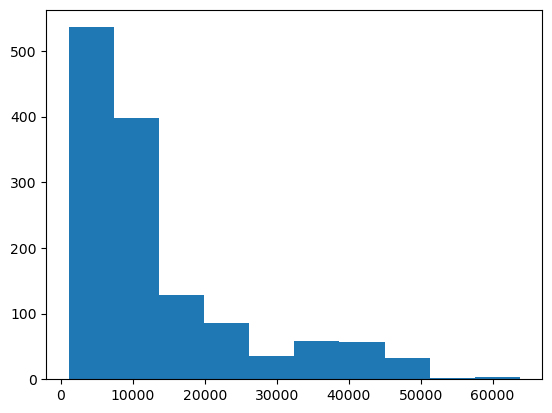

In [141]:
_ = plt.hist(medical['charges'], bins=10)
plt.show()

In [142]:
charges_mean = np.mean(medical['charges'])
charges_std = np.std(medical['charges'])
print(charges_mean, charges_std)

13270.422265141257 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Take random samples of the random sample making the data be normally distributed.  Once the data is in Gaussian form, conduct hypothesis testing using a confidence level of 95%.  Then compare the observation (12,000) to what the mean, standard deviation, and confidence interval is.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ In this case, I believe a one-sided interval is most appropriate for this case. The 95% confidence interval of the mean using the t-distribution is: 13267.786908932509. Additionally, the observation of 12,000 is more than 10 standard deviations away.  Very unlikely.

In [143]:
def charges_sampler(n):
    return np.random.choice(medical['charges'], n)

def charges_sampling(n):
    sampling_means = np.zeros(n)
    for i in range(n):
        sample = charges_sampler(n)
        sample_mean = np.mean(sample)
        sampling_means[i] = sample_mean

    return sampling_means

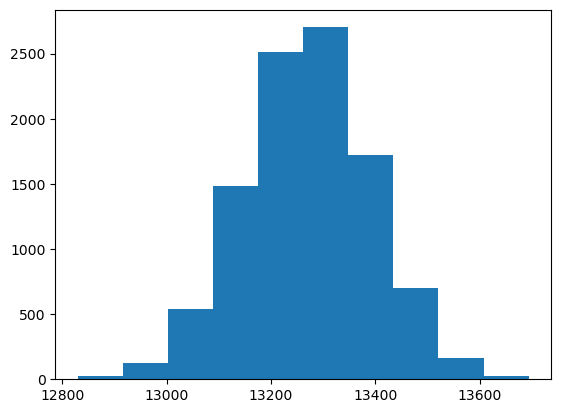

In [144]:
n=10000
resample_data = charges_sampling(n)
_ = plt.hist(resample_data, bins=10)
plt.show()
resamp_mean = np.mean(resample_data)
resamp_std = np.std(resample_data)

In [145]:
import scipy.stats as stats
obs = 12000
diff = obs - resamp_mean
print(diff)
print(resamp_std)
std_away_from_mean = diff/resamp_std
print(std_away_from_mean)
norm.cdf(std_away_from_mean)

# $12,000 is 10 standard deviations away from the mean! No need to worry
confidence_level = 0.95
deg_freedom = n - 1
t_value = stats.t.ppf((confidence_level), df=deg_freedom)
margin_of_error = t_value * (resamp_std / np.sqrt(n))

confidence_interval = (resamp_mean - margin_of_error)
print(f"The 95% confidence interval of the mean using the t-distribution is: {confidence_interval}")

-1270.2653086375376
122.12694908644323
-10.401187601423052
The 95% confidence interval of the mean using the t-distribution is: 13268.256312956766


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. 

Null Hypothesis: There is no significant difference between the means of the two groups; with_ins_mean = without_ins_mean.
Alternative Hypothesis: insurance_mean does not equal without_ins_mean

Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?
We are assuming homogeneity of variances (both population variations are equal).

__A:__

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [146]:
medical['with_ins'] = medical['charges'] * medical['insuranceclaim']
medical['without_ins'] = medical['charges'] * (1-medical['insuranceclaim'])


df = medical[(medical['with_ins']!= 0)]
print(df['with_ins'])
df1 = medical[(medical['without_ins']!= 0)]
print(df1['without_ins'])

0       16884.92400
1        1725.55230
4        3866.85520
6        8240.58960
10       2721.32080
           ...     
1330    12629.16560
1331    10795.93733
1334     2205.98080
1335     1629.83350
1337    29141.36030
Name: with_ins, Length: 783, dtype: float64
2        4449.46200
3       21984.47061
5        3756.62160
7        7281.50560
8        6406.41070
           ...     
1324     4239.89265
1328    22395.74424
1332    11411.68500
1333    10600.54830
1336     2007.94500
Name: without_ins, Length: 555, dtype: float64


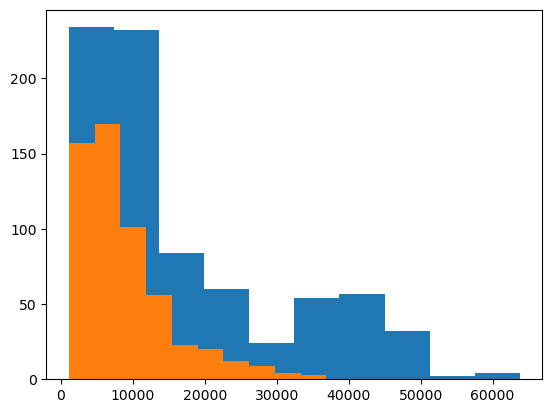

In [147]:
_=plt.hist(df['with_ins'], bins=10)
_=plt.hist(df1['without_ins'], bins=10)
plt.show()

In [148]:

def with_sampler(n):
    return np.random.choice(df['with_ins'], n)

def with_sampling(n):
    sampling_means = np.zeros(n)
    for i in range(n):
        sample = with_sampler(n)
        sample_mean = np.mean(sample)
        sampling_means[i] = sample_mean

    return sampling_means

def without_sampler(n):
    return np.random.choice(df1['without_ins'], n)


def without_sampling(n):
    sampling_means = np.zeros(n)
    for i in range(n):
        sample = without_sampler(n)
        sample_mean = np.mean(sample)
        sampling_means[i] = sample_mean

    return sampling_means

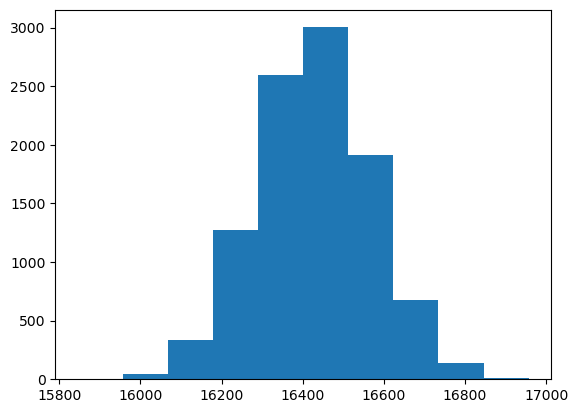

16424.672381833294
8821.464984916713


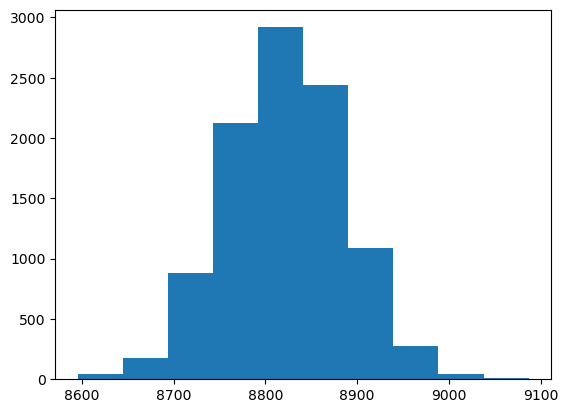

In [149]:
n=10000
with_ins_mean = np.mean(with_sampling(n))
without_ins_mean = np.mean(without_sampling(n))
with_ins_std = np.std(with_sampling(n))
without_ins_std = np.std(without_sampling(n))
_=plt.hist(with_sampling(n), bins=10)
plt.show()
_=plt.hist(without_sampling(n), bins=10)

print(with_ins_mean)
print(without_ins_mean)

In [150]:
n0 = len(df['with_ins'])
n1 = len(df1['without_ins'])
print(n0, n1)
s0 = with_ins_std
s1= without_ins_std
first = (n0-1)*s0**2
second= (n1-1)*s1**2
third = (n0 +n1 -2)
sp = np.sqrt((first + second) / third)

t_stat_man = (with_ins_mean - without_ins_mean) / (sp*np.sqrt(1/n0 + 1/n1))
print(t_stat_man)

t_stat, p_value = stats.ttest_ind(medical['with_ins'], medical['without_ins'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

783 555
1189.8633253820165
t-statistic: 14.778595791717247
p-value: 1.4399405371216593e-47


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

I did not get the same answer, unfortunately.  I think it is because my n0 and n1 values are incorrect. Should n0 and n1 be from the original distribution or from the resampling where I took 10000 entries?

Using the scipy ttest, t > p; therefore, the evidence suggests to reject the null hypothesis ie The means of with insurance and without insurance are not equal.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, there is not a z-test. Because for the z-test, you need the population parameters. However, if you know those parameters, you can calculate the z-statistic using the cumulative distribution function in scipy.

In [151]:
stats?



## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test